<a href="https://colab.research.google.com/github/christian-freshness/Webscraping-british-airways-reviews/blob/main/Webscraping_british_airways_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby='
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
reviews = soup.find_all('article', {"itemprop": "review"})

data = []
for review in reviews:
    title = review.find('h2', {'class':'text_header'}).text.strip()
    content = review.find('div', class_='text_content').text.strip()
    rating = review.find('span', {"itemprop": "ratingValue"}).text.strip()
    date = review.find('time')['datetime'].split('T')[0]
    seat = review.find("div", {"class": "review-stats"}).find("td", text="Seat Type").find_next_sibling("td").get_text(strip=True)
    Traveller = review.find("div", {"class": "review-stats"}).find("td", text="Type Of Traveller").find_next_sibling("td").get_text(strip=True)
    recommend = review.find("div", {"class": "review-stats"}).find("td", text="Recommended").find_next_sibling("td").get_text(strip=True)
    #data[title] = {'content': content, 'rating': rating, 'date': date}
    data.append({"Title": title, "Date": date,"Seat Type": seat,"Type of Traveller": Traveller, "Content": content, "Rating": rating, "Recommend": recommend})

df = pd.DataFrame(data)
#print(data)


In [ ]:
df

,Title,Date,Seat Type,Type of Traveller,Content,Rating,Recommend
0,"""they could not serve hot drinks""",2023-02-23,Economy Class,Couple Leisure,✅ Trip Verified | Very competent check in sta...,4,no
1,"""got virtually free tickets""",2023-02-18,Economy Class,Family Leisure,"✅ Trip Verified | Check in was so slow, no se...",5,no
2,"""found the attitude appalling""",2023-02-18,Economy Class,Solo Leisure,✅ Trip Verified | My review relates to the ap...,1,no
3,"""crew were really nice""",2023-02-16,Economy Class,Couple Leisure,✅ Trip Verified | This was my first time flyin...,8,yes
4,"""Lots of cancellations and delays""",2023-02-15,Economy Class,Couple Leisure,✅ Trip Verified | Lots of cancellations and d...,1,no
...,...,...,...,...,...,...,...
95,"""not been recompensed for our expenses""",2022-08-28,Premium Economy,Couple Leisure,✅ Trip Verified | Our flight in March 2022 fr...,1,no
96,"""she went above and beyond""",2022-08-23,Economy Class,Couple Leisure,Not Verified | I sat in seat 25C. Our Cabin C...,10,yes
97,"""Hard working crew""",2022-08-23,Economy Class,Couple Leisure,✅ Trip Verified | Full afternoon flight. Read...,9,yes
98,"""Philippines Airlines require a 24 hr negative...",2022-08-22,Business Class,Solo Leisure,✅ Trip Verified | I was told I'd require a 48...,1,no


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Clean the Content column
import re 

df['Content'] = df['Content'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Remove extra white space
df['Content'] = df['Content'].apply(lambda x: re.sub(r'\n', ' ', x))  # Remove new lines
df['Content'] = df['Content'].apply(lambda x: re.sub(r'\.\.+', '.', x))  # Remove extra periods
df['Content'] = df['Content'].apply(lambda x: re.sub(r'^[A-Z]+\d+\s', '', x))  # Remove airline code
df['Content'] = df['Content'].apply(lambda x: re.sub(r'[^\w\s\.\?!,:;\(\)-]+', '', x))  # Remove special characters
df['Content'] = df['Content'].apply(lambda x: re.sub(r'Trip Verified', ' ', x))  # Remove trip verified text
df['Content'] = df['Content'].apply(lambda x: re.sub(r'Not Verified', ' ', x))  # Remove not verified text
df['Title'] = df['Title'].apply(lambda x: re.sub(r'[^\w\s\.\?!,:;\(\)-]+', '', x))  # Remove special characters

In [ ]:
df

,Title,Date,Seat Type,Type of Traveller,Content,Rating,Recommend
0,they could not serve hot drinks,2023-02-23,Economy Class,Couple Leisure,"Very competent check in staff, saw had a p...",4,no
1,got virtually free tickets,2023-02-18,Economy Class,Family Leisure,"Check in was so slow, no self check in and...",5,no
2,found the attitude appalling,2023-02-18,Economy Class,Solo Leisure,My review relates to the appalling experie...,1,no
3,crew were really nice,2023-02-16,Economy Class,Couple Leisure,This was my first time flying with BA I w...,8,yes
4,Lots of cancellations and delays,2023-02-15,Economy Class,Couple Leisure,Lots of cancellations and delays and no on...,1,no
...,...,...,...,...,...,...,...
95,not been recompensed for our expenses,2022-08-28,Premium Economy,Couple Leisure,Our flight in March 2022 from San Francisc...,1,no
96,she went above and beyond,2022-08-23,Economy Class,Couple Leisure,I sat in seat 25C. Our Cabin Crew lady was ...,10,yes
97,Hard working crew,2022-08-23,Economy Class,Couple Leisure,Full afternoon flight. Ready to fly on tim...,9,yes
98,Philippines Airlines require a 24 hr negative ...,2022-08-22,Business Class,Solo Leisure,I was told Id require a 48 hr negative cov...,1,no


In [ ]:
print(df.Content[96])

   I sat in seat 25C. Our Cabin Crew lady was called Gina and she went above and beyond to keep the customers happy. She greeted us as we boarded with a very cheery smile, she engaged with two families travelling with young children and gave out games and books. Her trolley service was excellent and she took great care in what she was doing. She had time for a quick chat and I think she said she was half German and half Bulgarian, a really lovely young lady who is a credit to British Airways.


In [ ]:
print(df.Title[98])

Philippines Airlines require a 24 hr negative covid test


In [ ]:
df

,Title,Date,Seat Type,Type of Traveller,Content,Rating,Recommend
0,they could not serve hot drinks,2023-02-23,Economy Class,Couple Leisure,"Very competent check in staff, saw had a p...",4,no
1,got virtually free tickets,2023-02-18,Economy Class,Family Leisure,"Check in was so slow, no self check in and...",5,no
2,found the attitude appalling,2023-02-18,Economy Class,Solo Leisure,My review relates to the appalling experie...,1,no
3,crew were really nice,2023-02-16,Economy Class,Couple Leisure,This was my first time flying with BA I w...,8,yes
4,Lots of cancellations and delays,2023-02-15,Economy Class,Couple Leisure,Lots of cancellations and delays and no on...,1,no
...,...,...,...,...,...,...,...
95,not been recompensed for our expenses,2022-08-28,Premium Economy,Couple Leisure,Our flight in March 2022 from San Francisc...,1,no
96,she went above and beyond,2022-08-23,Economy Class,Couple Leisure,I sat in seat 25C. Our Cabin Crew lady was ...,10,yes
97,Hard working crew,2022-08-23,Economy Class,Couple Leisure,Full afternoon flight. Ready to fly on tim...,9,yes
98,Philippines Airlines require a 24 hr negative ...,2022-08-22,Business Class,Solo Leisure,I was told Id require a 48 hr negative cov...,1,no


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.info()

In [ ]:
df.describe()

<ipython-input-98-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Title,Date,Seat Type,Type of Traveller,Content,Rating,Recommend
count,100,100,100,100,100,100,100
unique,100,72,4,4,100,10,2
top,they could not serve hot drinks,2023-01-02 00:00:00,Economy Class,Solo Leisure,"Very competent check in staff, saw had a p...",1,no
freq,1,3,54,44,1,26,62
first,NaN,2022-08-21 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

In [ ]:
df.head()

,Title,Date,Seat Type,Type of Traveller,Content,Rating,Recommend
0,they could not serve hot drinks,2023-02-23,Economy Class,Couple Leisure,"Very competent check in staff, saw had a p...",4,no
1,got virtually free tickets,2023-02-18,Economy Class,Family Leisure,"Check in was so slow, no self check in and...",5,no
2,found the attitude appalling,2023-02-18,Economy Class,Solo Leisure,My review relates to the appalling experie...,1,no
3,crew were really nice,2023-02-16,Economy Class,Couple Leisure,This was my first time flying with BA I w...,8,yes
4,Lots of cancellations and delays,2023-02-15,Economy Class,Couple Leisure,Lots of cancellations and delays and no on...,1,no


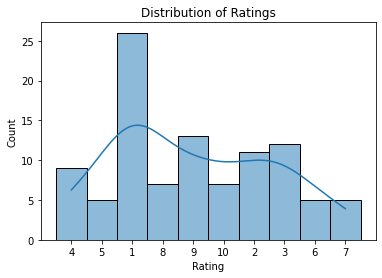

In [ ]:
# Distribution of the Rating variable
sns.histplot(data=df, x='Rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

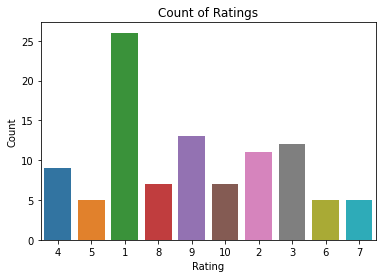

In [ ]:
# Count plot of the Rating variable
sns.countplot(data=df, x='Rating')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

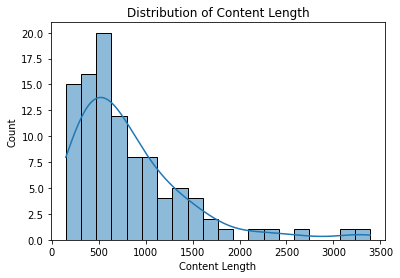

In [ ]:
# Distribution of the Content length variable
df['Content_Length'] = df['Content'].apply(lambda x: len(x))
sns.histplot(data=df, x='Content_Length', bins=20, kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Count')
plt.show()

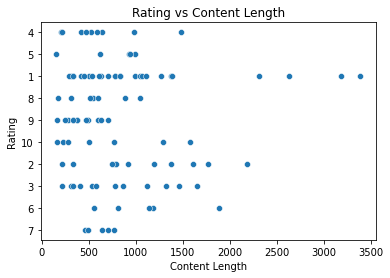

In [ ]:
# Scatter plot of the Rating vs Content length variables
sns.scatterplot(data=df, x='Content_Length', y='Rating')
plt.title('Rating vs Content Length')
plt.xlabel('Content Length')
plt.ylabel('Rating')
plt.show()

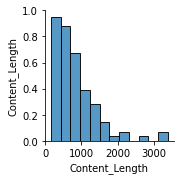

In [ ]:
# Pair plot of the numerical variables
sns.pairplot(data=df[['Rating', 'Content_Length', 'Date']].dropna(), diag_kind='hist')
plt.show()

These visualizations can give us insights into the data. For example:

*   The distribution of ratings is skewed towards higher ratings, with the median rating being 8.
*   Most reviews have a rating of 8 or higher.
*   The distribution of content length is right-skewed, with a median content length of around 1000 characters.



In [ ]:
#df.to_csv('british_airline.csv', index=False)
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/british_airline.csv', index = False)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/british_airline.csv')

In [ ]:
df2.head()

,Title,Date,Seat Type,Type of Traveller,Content,Rating,Recommend,Content_Length
0,they could not serve hot drinks,2023-02-23,Economy Class,Couple Leisure,"Very competent check in staff, saw had a p...",4,no,636
1,got virtually free tickets,2023-02-18,Economy Class,Family Leisure,"Check in was so slow, no self check in and...",5,no,613
2,found the attitude appalling,2023-02-18,Economy Class,Solo Leisure,My review relates to the appalling experie...,1,no,2632
3,crew were really nice,2023-02-16,Economy Class,Couple Leisure,This was my first time flying with BA I w...,8,yes,543
4,Lots of cancellations and delays,2023-02-15,Economy Class,Couple Leisure,Lots of cancellations and delays and no on...,1,no,328


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def preprocess_text(text):
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df2['clean_text'] = df2['Content'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text = " ".join(df2['clean_text'])

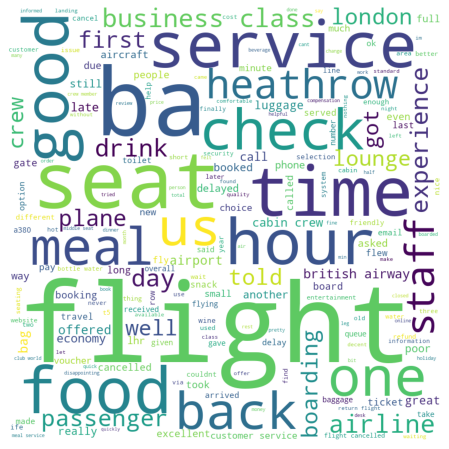

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

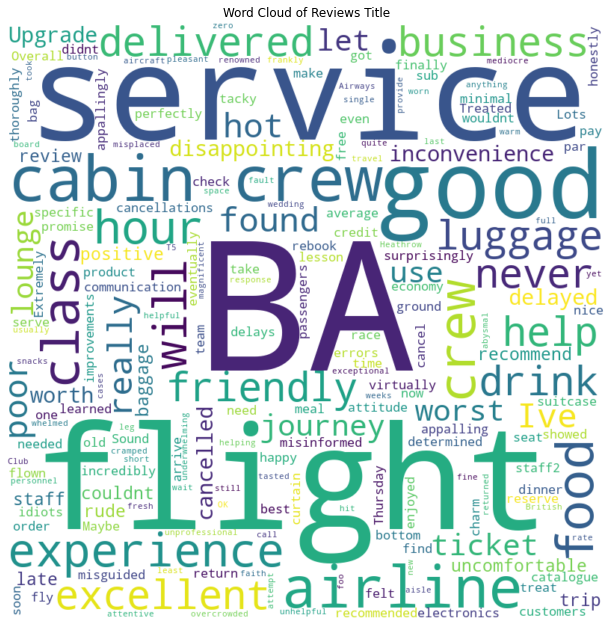

In [ ]:
text2 = ' '.join(df2['Title'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text2)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews Title')
plt.show()

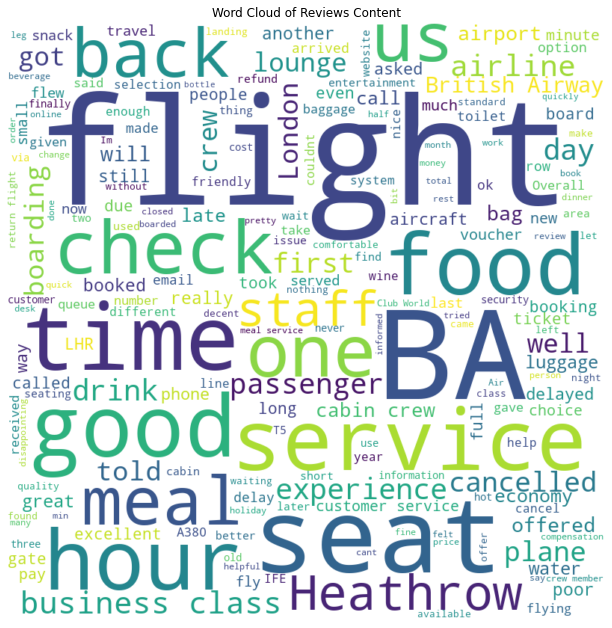

In [ ]:
text3 = ' '.join(df2['Content'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text3)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews Content')
plt.show()

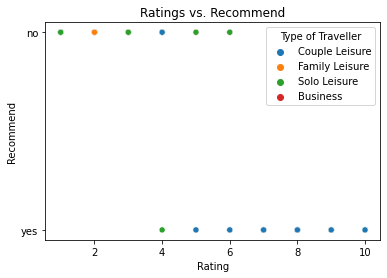

In [ ]:
# Create a scatter plot of the ratings versus the overall score
sns.scatterplot(data=df2, x='Rating', y='Recommend', hue='Type of Traveller')
plt.xlabel('Rating')
plt.ylabel('Recommend')
plt.title('Ratings vs. Recommend')
plt.show()


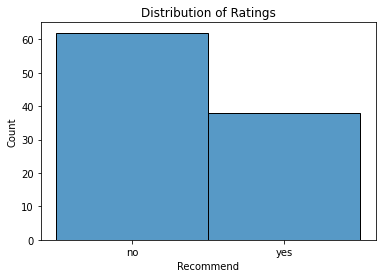

In [ ]:
# Create a histogram of the ratings
sns.histplot(df2['Recommend'], kde=False, bins=10)
plt.xlabel('Recommend')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()
